Appliquer des series temporelles sur les RNN ne demandent que 2 changements pricipaux:
 - modifier la forme de l'entrée de la couche LSTM pour réfléter la structure 2D
 - la couche Dense finale doit avoir un neurone par varaible/feature
 
 Utilisation d'un data set qui enregistre toutes les 10 mins avec un système de capteur sans fil.
le réseau de capteurs enregistre différentes features toutes les 10 min pendant 4 mois et demi
prendre une partie du dataset pour faire une prédiction de 24h dans le futur

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lecturee des données 
df=pd.read_csv('energydata_complete.csv',index_col='date',infer_datetime_format=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

<AxesSubplot:xlabel='date'>

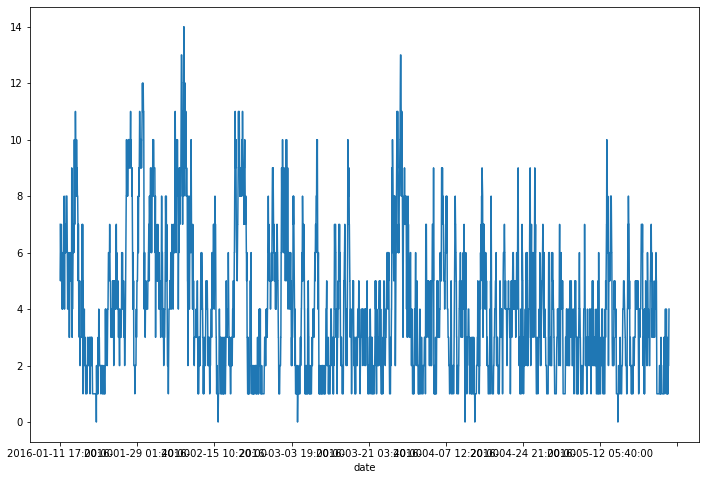

In [4]:
df['Windspeed'].plot(figsize=(12,8))

In [6]:
len(df)

19735

In [7]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [8]:
# pour voir les 5 dernières données 
df.tail(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [9]:
# on garde toutes les données après le 01/05/2016 c'est à dire tout le mois de mai: on selectionne un trancon de notre df
df=df.loc['2016-05-01':]

In [10]:
# arronfdir les valeurs
df=df.round(2)

In [11]:
len(df)

3853

In [12]:
# combien de lignes par jour pour la taille de notre batch ? nous savons qu'on enregistre les données toutes les 10 min
# dans une journée il y a 24h et 60 min/heure
24*60/10 # qui correspond au nombre de ligne pour une journée

144.0

In [13]:
# si on veut un ensemble de test pour une durée de 2 jours 
test_days=2

In [14]:
# Pour avoir le total de ligne pour le set de test
test_ind=test_days*144# nombre de ligne pour que mon set de test soit égale à deux jours

In [15]:
# utilisation de la localisation par entier pour localiser les ensembles de test et d'entraînement
train=df.iloc[:- test_ind]
test=df.iloc[-test_ind:]

# Mise à l'échelle des données

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test) 

# Generateur de séries temporelles

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length= 144 # longeur de séquences de sortie (en nombre de pas temporel): cycle complet d'une journée dans la longeur de mon batch
# Etant donné un jour entier, donnez moi la prévision des 10 min qui viennent juste après
batch_size=1 # Nombre d'échantllon de série temporelle dans chaque batch (lot)
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)


2022-04-21 14:53:05.017150: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-21 14:53:05.017173: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [19]:
# premier batch
X,y=generator[0]
# ce premier batch passe toutes les colonnes, série temporelle multivariée
# étant donné ces 140 point de données de chaque colonne de features, celà prédit les 10 min suivantes de données essentiellement une ligne dans le futur tte ces variables
# on a une prédiction par feature 

# Création du modèle 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [21]:
from pandas.core.arrays.datetimes import sequence_to_datetimes
# définir le model
model=Sequential()

# Couche  LSTM
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# prediction finale (un neurone par feature caractéristique)
model.add(Dense(scaled_train.shape[1]))

# compilation du modèle 
model.compile(loss='mse',optimizer='adam')

2022-04-21 14:54:57.222804: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-21 14:54:57.222840: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-21 14:54:57.222869: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hprisser): /proc/driver/nvidia/version does not exist
2022-04-21 14:54:57.223155: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 28)                2828      
                                                                 
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


# Early stopping

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [24]:
# Applciation au modèle
model.fit(generator,epochs=10,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/10
3421/3421 [==============================] - 133s 38ms/step - loss: 0.0115 - val_loss: 0.0094
Epoch 2/10
3421/3421 [==============================] - 132s 39ms/step - loss: 0.0079 - val_loss: 0.0083
Epoch 3/10
3421/3421 [==============================] - 122s 36ms/step - loss: 0.0075 - val_loss: 0.0080
Epoch 4/10
3421/3421 [==============================] - 122s 36ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 5/10
3421/3421 [==============================] - 121s 35ms/step - loss: 0.0072 - val_loss: 0.0083


<AxesSubplot:>

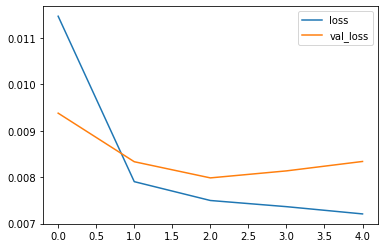

In [25]:
# Tracer les loss
losses=pd.DataFrame(model.history.history)
losses.plot()


# Evaluation du modèle sur le test_set

In [26]:
first_eval_batch=scaled_train[-length:]

In [27]:
# conversion du batch actuel au bon format pour le model: ce premier batch a ces 28 colonnes de features
first_eval_batch=first_eval_batch.reshape((1,length,scaled_train.shape[1]))

In [28]:
model.predict(first_eval_batch)

array([[0.09574486, 0.02363471, 0.71905327, 0.40636396, 0.55561763,
        0.45634422, 0.4103682 , 0.45815253, 0.70814615, 0.3985049 ,
        0.31744954, 0.38562155, 0.65823233, 0.00206419, 0.61608154,
        0.39027262, 0.51799   , 0.34122312, 0.533387  , 0.357794  ,
        0.62539625, 0.50036347, 0.45676893, 0.20954213, 0.5877903 ,
        0.5568348 , 0.5087335 , 0.49183002]], dtype=float32)

In [29]:
# Boucle For pour la prédiction de nos 28 features
n_features=scaled_train.shape[1]
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,scaled_train.shape[1]))

for i in range(len(test)):
    # obtenir la prédiction avec 1 time stamp d'avance[0] pour ne saisir que le nombre au lieu du tableau, on prédit avec 1 unité de temps d'avance
    current_pred=model.predict(current_batch)[0]
    # stockage de la prediction actuelle dans la liste test_prediction
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

# Transformation inverse et comparaison

In [31]:

true_predictions=scaler.inverse_transform(test_predictions)

In [32]:
true_predictions=pd.DataFrame(data=true_predictions,columns=test.columns)

In [33]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,93.723545,0.709041,24.610843,38.255964,24.318552,35.806856,25.030029,37.438246,24.157023,37.503048,...,21.980290,37.610552,16.959669,755.508287,58.714439,2.095421,40.267419,8.010508,25.431414,24.586746
1,79.435081,0.830727,24.621701,38.506445,24.321656,36.035657,24.977978,37.694885,24.086323,37.504278,...,21.963324,37.806162,16.906519,754.831217,59.633630,2.160303,39.223231,8.240086,25.336130,24.820544
2,72.670085,0.774580,24.628130,38.672311,24.310823,36.317698,24.932471,37.959219,24.037154,37.566210,...,21.955465,38.052465,16.825391,754.171745,60.702680,2.219149,38.223933,8.494604,25.298360,24.848919
3,68.443033,0.644005,24.622518,38.824194,24.274047,36.597177,24.892451,38.192701,23.988618,37.660624,...,21.944053,38.295595,16.714962,753.496380,61.731664,2.272169,37.272285,8.745494,25.145328,24.739025
4,65.516657,0.473005,24.613246,39.003893,24.227738,36.918023,24.860680,38.412826,23.948199,37.787942,...,21.937015,38.553972,16.602062,752.844254,62.851083,2.324375,36.397724,8.996432,24.985722,24.620937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,35.280714,-6.734209,23.671363,3.632864,31.934422,2.785459,21.467733,16.987584,21.906167,19.064414,...,20.863527,51.576701,8.177397,769.647092,9.406980,8.305040,133.881931,-20.136191,27.954334,20.516177
284,34.046619,-6.589854,23.549230,4.057169,31.634399,3.238132,21.259019,16.830593,21.967230,18.679897,...,20.828909,51.851030,6.781150,771.421727,9.987717,8.572729,136.026111,-20.718300,28.486827,20.616504
285,32.791433,-6.419912,23.432946,4.617839,31.383503,3.737878,21.089390,16.851551,22.039757,18.401043,...,20.793422,52.080349,5.597905,773.017339,10.479000,8.851441,138.035350,-21.107431,28.947371,20.737678
286,31.483133,-6.228231,23.325674,5.282139,31.179912,4.266321,20.964473,17.050127,22.121311,18.229153,...,20.760154,52.234172,4.658128,774.417266,10.831027,9.135570,139.705014,-21.317088,29.323192,20.895325
